# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `assets/Employee_Movie_Choices.txt`.

A second file, `assets/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np


# This is the set of employees
employees = set(
    ["Pablo", "Lee", "Georgia", "Vincent", "Andy", "Frida", "Joan", "Claude"]
)

# This is the set of movies
movies = set(
    [
        "The Shawshank Redemption",
        "Forrest Gump",
        "The Matrix",
        "Anaconda",
        "The Social Network",
        "The Godfather",
        "Monty Python and the Holy Grail",
        "Snakes on a Plane",
        "Kung Fu Panda",
        "The Dark Knight",
        "Mean Girls",
    ]
)


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    """
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    """
    # %matplotlib notebook
    import matplotlib.pyplot as plt

    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None

    if weight_name:
        weights = [int(G[u][v][weight_name]) for u, v in edges]
        labels = nx.get_edge_attributes(G, weight_name)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights)
    else:
        nx.draw_networkx(
            G,
            pos,
        )

### Question 1

Using NetworkX, load in the bipartite graph from `assets/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

In [24]:
column_names = ["emp", "movie"]
movie_choices = pd.read_csv(
    "assets/Employee_Movie_Choices.txt", header=0, delimiter="\t", names=column_names
)

In [25]:
movie_choices

,emp,movie
0,Andy,Anaconda
1,Andy,Mean Girls
2,Andy,The Matrix
3,Claude,Anaconda
4,Claude,Monty Python and the Holy Grail
5,Claude,Snakes on a Plane
6,Frida,The Matrix
7,Frida,The Shawshank Redemption
8,Frida,The Social Network
9,Georgia,Anaconda


In [22]:
employee_relationships

,emp1,emp2,score
0,Andy,Claude,0
1,Andy,Frida,20
2,Andy,Georgia,-10
3,Andy,Joan,30
4,Andy,Lee,-10
5,Andy,Pablo,-10
6,Andy,Vincent,20
7,Claude,Frida,0
8,Claude,Georgia,90
9,Claude,Joan,0


In [ ]:
g_bi = nx.from_pandas_edgelist(movie_choices, "emp", "movie")

In [59]:
assert not g_bi.is_multigraph()
assert not g_bi.is_directed()

In [ ]:
from networkx.algorithms import bipartite

bipartite.is_bipartite(g_bi)

I'm not sure how to determine the order here.  
If I really wanted to, I could check for set memebership of one of the names

In [57]:
emps, movies = bipartite.sets(g_bi)

In [44]:
emps

{'Andy', 'Claude', 'Frida', 'Georgia', 'Joan', 'Lee', 'Pablo', 'Vincent'}

In [45]:
movies

{'Anaconda',
 'Forrest Gump',
 'Kung Fu Panda',
 'Mean Girls',
 'Monty Python and the Holy Grail',
 'Snakes on a Plane',
 'The Dark Knight',
 'The Godfather',
 'The Matrix',
 'The Shawshank Redemption',
 'The Social Network'}

In [ ]:
def answer_one():

    # YOUR CODE HERE
    column_names = ["emp", "movie"]
    movie_choices = pd.read_csv(
        "assets/Employee_Movie_Choices.txt",
        header=0,
        delimiter="\t",
        names=column_names,
    )
    g_bi = nx.from_pandas_edgelist(movie_choices, "emp", "movie")
    return g_bi

In [ ]:
assert type(answer_one()) == nx.Graph, "Your return type should be a Graph object"
assert bipartite.is_bipartite(g_bi)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [ ]:
def answer_two():

    # YOUR CODE HERE
    from networkx.algorithms import bipartite

    g_bi = answer_one()
    emps, movies = bipartite.sets(g_bi)

    for employee in emps:
        g_bi.nodes()[employee]["type"] = "employee"

    for movie in movies:
        g_bi.nodes()[movie]["type"] = "movie"
    return g_bi

In [75]:
len(answer_two().edges())

24

In [ ]:
assert type(answer_two()) == nx.Graph, "Your return type should be a Graph object"
assert len(answer_two().edges()) == 24
assert len(answer_two().nodes()) == 19

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [60]:
p = bipartite.projected_graph(g_bi, emps)

In [65]:
pw = bipartite.weighted_projected_graph(g_bi, emps)

In [67]:
pw.edges(data=True)

EdgeDataView([('Lee', 'Joan', {'weight': 3}), ('Lee', 'Andy', {'weight': 1}), ('Georgia', 'Claude', {'weight': 3}), ('Georgia', 'Andy', {'weight': 1}), ('Vincent', 'Pablo', {'weight': 1}), ('Vincent', 'Frida', {'weight': 2}), ('Andy', 'Joan', {'weight': 1}), ('Andy', 'Frida', {'weight': 1}), ('Andy', 'Claude', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Frida', 'Pablo', {'weight': 2})])

In [126]:
def answer_three():
    # YOUR CODE HERE
    from networkx.algorithms import bipartite

    g_bi = answer_two()
    emps, movies = bipartite.sets(g_bi)

    pw = bipartite.weighted_projected_graph(g_bi, emps)
    return pw

EdgeDataView([('Lee', 'Joan', {'weight': 3}), ('Lee', 'Andy', {'weight': 1}), ('Georgia', 'Claude', {'weight': 3}), ('Georgia', 'Andy', {'weight': 1}), ('Vincent', 'Pablo', {'weight': 1}), ('Vincent', 'Frida', {'weight': 2}), ('Andy', 'Joan', {'weight': 1}), ('Andy', 'Frida', {'weight': 1}), ('Andy', 'Claude', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Frida', 'Pablo', {'weight': 2})])

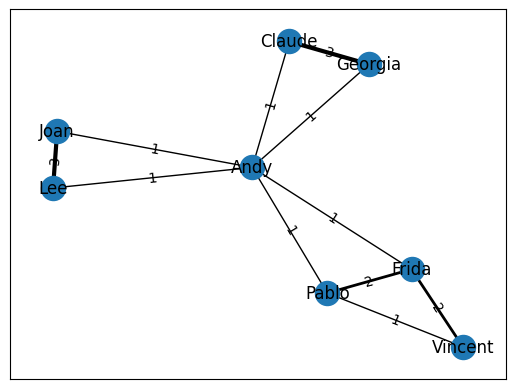

In [127]:
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data=True)

In [ ]:
assert type(answer_three()) == nx.Graph, "Your return type should be a Graph object"

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [83]:
pw = answer_three()
list(pw.edges(data=True))

[('Lee', 'Joan', {'weight': 3}),
 ('Lee', 'Andy', {'weight': 1}),
 ('Georgia', 'Claude', {'weight': 3}),
 ('Georgia', 'Andy', {'weight': 1}),
 ('Vincent', 'Pablo', {'weight': 1}),
 ('Vincent', 'Frida', {'weight': 2}),
 ('Andy', 'Joan', {'weight': 1}),
 ('Andy', 'Frida', {'weight': 1}),
 ('Andy', 'Claude', {'weight': 1}),
 ('Andy', 'Pablo', {'weight': 1}),
 ('Frida', 'Pablo', {'weight': 2})]

Sort the employee names for consistency, so we don't miss one

In [ ]:
shared_movies_data = sorted(
    [(*sorted([u, v]), d["weight"]) for u, v, d in pw.edges(data=True)]
)
shared_movies_data

[('Andy', 'Claude', 1),
 ('Andy', 'Frida', 1),
 ('Andy', 'Georgia', 1),
 ('Andy', 'Joan', 1),
 ('Andy', 'Lee', 1),
 ('Andy', 'Pablo', 1),
 ('Claude', 'Georgia', 3),
 ('Frida', 'Pablo', 2),
 ('Frida', 'Vincent', 2),
 ('Joan', 'Lee', 3),
 ('Pablo', 'Vincent', 1)]

In [115]:
shared_movies = pd.DataFrame(
    data=shared_movies_data, columns=["employee1", "employee2", "shared_movie_count"]
)
shared_movies

,employee1,employee2,shared_movie_count
0,Andy,Claude,1
1,Andy,Frida,1
2,Andy,Georgia,1
3,Andy,Joan,1
4,Andy,Lee,1
5,Andy,Pablo,1
6,Claude,Georgia,3
7,Frida,Pablo,2
8,Frida,Vincent,2
9,Joan,Lee,3


In [114]:
column_names = ["emp1", "emp2", "relationship"]
employee_relationships = pd.read_csv(
    "assets/Employee_Relationships.txt", header=None, delimiter="\t", names=column_names
).assign(
    **{
        "employee1": lambda df: df[["emp1", "emp2"]].apply(
            lambda row: sorted(row)[0], axis=1
        ),
        "employee2": lambda df: df[["emp1", "emp2"]].apply(
            lambda row: sorted(row)[1], axis=1
        ),
    }
)[
    ["employee1", "employee2", "relationship"]
]
employee_relationships

,employee1,employee2,relationship
0,Andy,Claude,0
1,Andy,Frida,20
2,Andy,Georgia,-10
3,Andy,Joan,30
4,Andy,Lee,-10
5,Andy,Pablo,-10
6,Andy,Vincent,20
7,Claude,Frida,0
8,Claude,Georgia,90
9,Claude,Joan,0


In [118]:
merged = pd.merge(
    shared_movies, employee_relationships, on=["employee1", "employee2"], how="outer"
).assign(shared_movie_count=lambda x: x["shared_movie_count"].fillna(0))
merged

,employee1,employee2,shared_movie_count,relationship
0,Andy,Claude,1.0,0
1,Andy,Frida,1.0,20
2,Andy,Georgia,1.0,-10
3,Andy,Joan,1.0,30
4,Andy,Lee,1.0,-10
5,Andy,Pablo,1.0,-10
6,Andy,Vincent,0.0,20
7,Claude,Frida,0.0,0
8,Claude,Georgia,3.0,90
9,Claude,Joan,0.0,0


In [109]:
import pandas as pd
from scipy.stats import pearsonr

# Step 1: Merge on employee pairs

# Step 2: Compute Pearson correlation
corr, p_value = pearsonr(merged['relationship'], merged['shared_movie_count'])

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {p_value:.3e}")


Pearson correlation: 0.788
P-value: 6.286e-07


In [112]:
corr

np.float64(0.7883962221733474)

In [110]:
merged[['relationship', 'shared_movie_count']].corr(method='pearson')

,relationship,shared_movie_count
relationship,1.000000,0.788396
shared_movie_count,0.788396,1.000000


In [111]:
merged[['relationship', 'shared_movie_count']].corr(method='pearson').loc['relationship', 'shared_movie_count']

np.float64(0.7883962221733475)

In [123]:
def answer_four():

    # YOUR CODE HERE
    pw = answer_three()
    # Sort the columns so the merged data includes all pairs
    shared_movies_data = sorted(
        [(*sorted([u, v]), d["weight"]) for u, v, d in pw.edges(data=True)]
    )
    shared_movies = pd.DataFrame(
        data=shared_movies_data,
        columns=["employee1", "employee2", "shared_movie_count"],
    )

    # Read in the employee relationships (sorted names)
    column_names = ["emp1", "emp2", "relationship"]
    cols_to_keep = ["employee1", "employee2", "relationship"]
    employee_relationships = pd.read_csv(
        "assets/Employee_Relationships.txt",
        header=None,
        delimiter="\t",
        names=column_names,
    ).assign(
        **{
            "employee1": lambda df: df[["emp1", "emp2"]].apply(
                lambda row: sorted(row)[0], axis=1
            ),
            "employee2": lambda df: df[["emp1", "emp2"]].apply(
                lambda row: sorted(row)[1], axis=1
            ),
        }
    )[
        cols_to_keep
    ]
    # Merge on employee pairs
    # If no movies in common, assign 0
    merged = pd.merge(
        shared_movies,
        employee_relationships,
        on=["employee1", "employee2"],
        how="outer",
    ).assign(shared_movie_count=lambda x: x["shared_movie_count"].fillna(0))

    corr = merged[['relationship', 'shared_movie_count']].corr(method='pearson').loc['relationship', 'shared_movie_count']
    return corr

In [124]:
answer_four()

np.float64(0.7883962221733475)

In [125]:
ans_four = answer_four()